In [1]:
#importing libraries 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


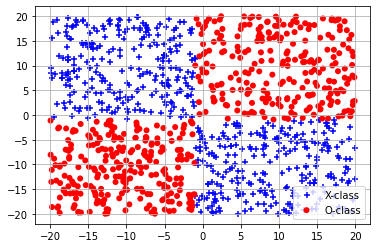

In [2]:
#4a data generation 
N = 250 ; 
Uh=20;
Ul= -1; 

x1 =np.concatenate([np.random.uniform(Ul, Uh, N), np.random.uniform(-Uh, Ul, N)])
y1 =np.concatenate([np.random.uniform(-Uh, Ul, N), np.random.uniform(Ul, Uh, N)])

x2 =np.concatenate([np.random.uniform(Ul, Uh, N), np.random.uniform(-Uh, Ul, N)])
y2 =np.concatenate([np.random.uniform(Ul, Uh, N), np.random.uniform(-Uh, Ul, N)])

plt.scatter(x1, y1,marker='+', c='blue', label='X-class')
plt.scatter(x2, y2,marker='o', c='red',edgecolors ='none', label='o-class')
#plt.show()
plt.legend(["X-class", "O-class"])
plt.grid(True)

In [3]:
#4b trainning data establishment (x_train) 
x = np.concatenate((x1, x2), axis=None) 
y = np.concatenate((y1, y2), axis=None) 
x = np.array(x) 
y = np.array(y) 
xy =np.vstack((x,y))
x_train= xy.transpose()
print(x_train)


[[  8.67859888 -14.15722436]
 [  9.73255983  -4.78216149]
 [  4.25223991  -4.50334605]
 ...
 [-17.51795377  -8.83034867]
 [ -4.03800866 -17.51192637]
 [-11.28983271  -7.66429831]]


In [4]:
#4b trainning data establishment (y_train) 
y_x = [1, 0]
y_o =[0, 1]
y_train= np.array([y_x,y_o])
y_train=np.repeat(y_train, [2*N, 2*N], axis=0)
print(y_train)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [12]:
#4c Model Setup
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 24        
                                                                 
 dense_6 (Dense)             (None, 2)                 18        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
#4d Model Training
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy'],
)
# fit the keras model on the dataset
history = model.fit(x_train, y_train,validation_split=0.1, epochs=200, batch_size=10, verbose= 1)

Epoch 1/200
90/90 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.5556 - val_loss: 0.8806 - val_accuracy: 0.0000e+00
Epoch 2/200
90/90 [==============================] - 0s 875us/step - loss: 0.6618 - accuracy: 0.5556 - val_loss: 0.8117 - val_accuracy: 0.0000e+00
Epoch 3/200
90/90 [==============================] - 0s 905us/step - loss: 0.6147 - accuracy: 0.6044 - val_loss: 0.7810 - val_accuracy: 0.0100
Epoch 4/200
90/90 [==============================] - 0s 859us/step - loss: 0.5539 - accuracy: 0.7278 - val_loss: 0.7230 - val_accuracy: 0.5400
Epoch 5/200
90/90 [==============================] - 0s 944us/step - loss: 0.5068 - accuracy: 0.8622 - val_loss: 0.6770 - val_accuracy: 0.6700
Epoch 6/200
90/90 [==============================] - 0s 825us/step - loss: 0.4666 - accuracy: 0.9022 - val_loss: 0.6133 - val_accuracy: 0.7800
Epoch 7/200
90/90 [==============================] - 0s 851us/step - loss: 0.4300 - accuracy: 0.9256 - val_loss: 0.5717 - val_accuracy: 

In [7]:
#4e Model Evaluation 
Nt = 75 ; # 150/2 each quadrant 
Uh=20;
Ul= -1; 

x1t =np.concatenate([np.random.uniform(Ul, Uh, Nt), np.random.uniform(-Uh, Ul, Nt)])
y1t =np.concatenate([np.random.uniform(-Uh, Ul, Nt), np.random.uniform(Ul, Uh, Nt)])

x2t =np.concatenate([np.random.uniform(Ul, Uh, Nt), np.random.uniform(-Uh, Ul, Nt)])
y2t =np.concatenate([np.random.uniform(Ul, Uh, Nt), np.random.uniform(-Uh, Ul, Nt)])

xt = np.concatenate((x1t, x2t), axis=None) 
yt = np.concatenate((y1t, y2t), axis=None)  
print(xt) 
print(yt)

xt = np.array(xt) 
yt = np.array(yt) 
print(x)
print(y)
xyt =np.vstack((xt,yt))
x_test= xyt.transpose()
print(x_test)

[ 16.28758725  17.10758432  -0.79282857   5.05360305   2.85267952
  15.42856584  11.05165028  16.27415335   0.37252997  10.741737
   5.26802641  12.41983488  -0.30593678  -0.945405    17.99272732
   8.9406446   -0.47004152   9.50275922  16.16845766  10.99482707
  10.68097877   8.20675531  19.3611093    9.43053252  15.14813316
  14.33312788   2.88569955  12.71789069   6.41817611  15.33731439
  14.90517607   4.45188818   0.23681998  10.63678093  13.63015201
   1.07604798  14.93490027  16.71685554   6.20535144  12.96184379
  12.55014936   7.75537899   7.70454048   6.77739647   2.66809489
  10.06689039   9.68532842  18.98807501  19.64865755  17.60711104
  10.16694802  17.83712336   1.8919025    7.50785029  19.3302454
  12.79573458   2.86221013   7.71400976  12.09323586  11.69372229
  18.25754916   3.72230616   8.16619689  16.56720909   1.16314599
  13.88291198   9.60228266   5.3113136   11.97203967  19.06494981
   2.68326642   7.84161686  17.194934    14.75981838  -0.5336262
  -2.05112859 

In [8]:
#4e Model Evaluation 
y_xt = [1, 0]
y_ot =[0, 1]
y_test= np.array([y_xt,y_ot])
y_test=np.repeat(y_test, [2*Nt, 2*Nt], axis=0)
print(y_test)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]

In [9]:
#4e Model Evaluation 
_, score = model.evaluate(x_test, y_test, verbose= 0)

print("Accuracy :", score)


Accuracy : 0.996666669845581


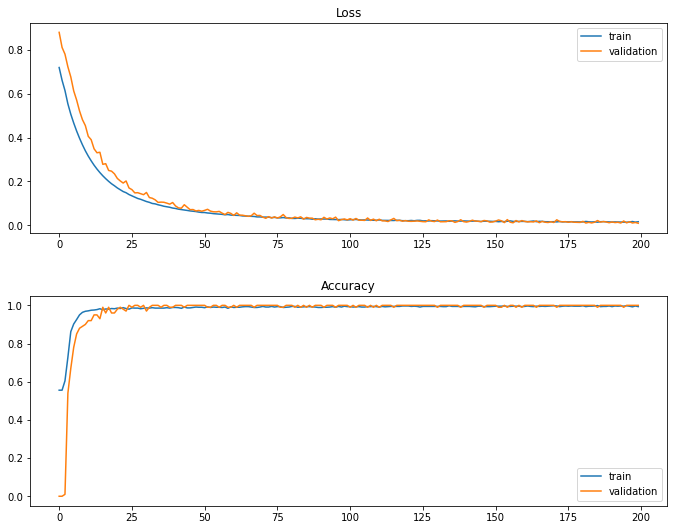

In [10]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (10, 8))

plt.subplot(211)
plt.title("Loss")
plt.plot(history.history['loss'], label = 'train')
# For validation loss (split)
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
# For validation accuracy (split)
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.legend()

figure.tight_layout(pad=3.0)
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 24        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
100/100 [==============================] - 0s 599us/step - loss: 0.7639 - accuracy: 0.5000
Epoch 2/200
100/100 [==============================] - 0s 624us/step - loss: 0.7219 - accuracy: 0.5000
Epoch 3/200
100/100 [==============================] - 0s 605us/step - loss: 0.7007 - accuracy: 0.5170
Epoch 4/200
100/100 [==============================] - 0s 597us/step - loss: 0.6877 - accuracy: 0.6180
Epoch 5/200
100/100 [================

(<Figure size 720x576 with 1 Axes>, <AxesSubplot:>)

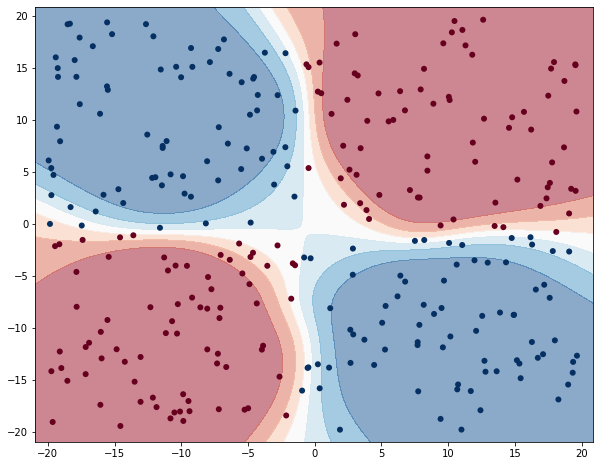

In [11]:
# Answer to the question no 4(h)

# Making the labels from two dimension to one dimension
# For (1, 0) = 1 and for (0, 1) = 0
def oneD_from_twoD(y):
  y_oned = []
  for i in range(len(y)):
    if y[i, 0] == 1:
      y_oned.append(1)
    else: y_oned.append(0)
  return(np.asarray(y_oned))

y_test_oned = oneD_from_twoD(y_test)
y_train_oned = oneD_from_twoD(y_train)

# Setting up he model for one dimensional output
model_2 = Sequential()
model_2.add(Dense(8, input_dim=2, activation='sigmoid'))
model_2.add(Dense(1, activation='sigmoid'))

print(model_2.summary())
model_2.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy'],
)

# Training your model
model_2.fit(x_train, y_train_oned, batch_size= 10, epochs= 200, verbose= 1)

# Evaluating model
_, score = model_2.evaluate(x_test,y_test_oned, verbose= 0)

print("Accuracy :", score)

# Plotting decision boundary
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = x1.min() - 1, y1.max() + 1
    ymin, ymax = x1.min() - 1, y1.max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots(figsize = (10, 8))
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=cmap, lw=0)

    return fig, ax

plot_decision_boundary(x_test, y_test_oned, model_2, cmap = 'RdBu')
